In [111]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [112]:
cd '/content/drive/My Drive/ML From Data To Tree To Rules'

/content/drive/My Drive/ML From Data To Tree To Rules


# Reading dataset

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz
import pandas as pd

dataset = pd.read_excel('Dataset.xlsx',index_col=0)

dataset

,Outloook,Temperature,Humidity,Wind,PlayTenis
Day,,,,,
1,Sunny,Hot,High,Weak,No
2,Sunny,Hot,High,Strong,No
3,Overcast,Hot,High,Weak,Yes
4,Rain,Mild,High,Weak,Yes
5,Rain,cool,Normal,Weak,Yes
6,Rain,Cool,Normal,Strong,No
7,Overcast,Cool,Normal,Strong,Yes
8,Sunny,Mild,High,Weak,No
9,Sunny,Cool,Normal,Weak,Yes


# Transforming dataset

In [114]:
convert = LabelEncoder()

for x in list(dataset.columns):
    dataset[x] = convert.fit_transform(dataset[x]);

In [115]:
dataset

,Outloook,Temperature,Humidity,Wind,PlayTenis
Day,,,,,
1,2,1,0,1,0
2,2,1,0,0,0
3,0,1,0,1,1
4,1,2,0,1,1
5,1,3,1,1,1
6,1,0,1,0,0
7,0,0,1,0,1
8,2,2,0,1,0
9,2,0,1,1,1


# Building model

In [116]:
y = dataset['PlayTenis']
X = dataset.drop(['PlayTenis'],axis=1)

decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree = decision_tree.fit(X, y)

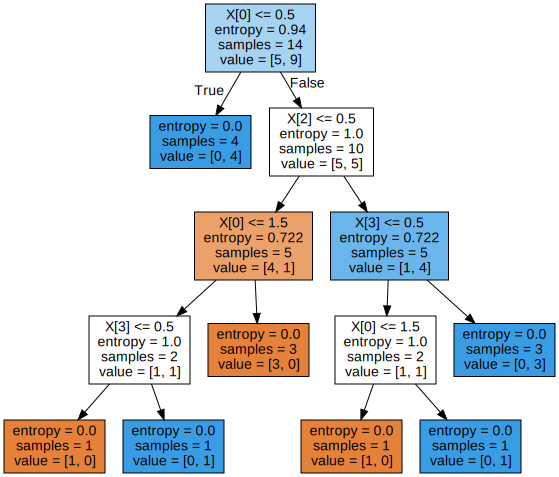

In [117]:
data = tree.export_graphviz(decision_tree, filled=True) 
graph = graphviz.Source(data) 
graph

# Text File

In [118]:
from sklearn.tree import export_text
rules = export_text(decision_tree, feature_names=list(X.columns),decimals=0)
print(rules)

|--- Outloook <= 0
|   |--- class: 1
|--- Outloook >  0
|   |--- Humidity <= 0
|   |   |--- Outloook <= 2
|   |   |   |--- Wind <= 0
|   |   |   |   |--- class: 0
|   |   |   |--- Wind >  0
|   |   |   |   |--- class: 1
|   |   |--- Outloook >  2
|   |   |   |--- class: 0
|   |--- Humidity >  0
|   |   |--- Wind <= 0
|   |   |   |--- Outloook <= 2
|   |   |   |   |--- class: 0
|   |   |   |--- Outloook >  2
|   |   |   |   |--- class: 1
|   |   |--- Wind >  0
|   |   |   |--- class: 1



In [119]:
result = decision_tree.predict(X)
result

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])